# <b>1 <span style='color:#0000FF'>|</span> Introduction</b>


![](https://th.bing.com/th/id/OIP.Kvx54lE82Qje8Z0yMxt1YQHaE7?pid=ImgDet&rs=1)

# <b>2 <span style='color:#0000FF'>|</span> Importing libraries</b>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

## Kmeans
from sklearn.cluster import KMeans


## Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)



# <b>3 <span style='color:#0000FF'>|</span> Reading the dataset</b>

In [2]:
df=pd.read_csv('OnlineRetail/OnlineRetail.csv',encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
## change CustomerID to object as it is a unique value for every customer
df['CustomerID']=df.CustomerID.astype('object')

In [6]:
df.describe().T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.000000,9.552250,218.081158,-80995.000000,1.000000,3.000000,10.000000,80995.000000
UnitPrice,541909.000000,4.611114,96.759853,-11062.060000,1.250000,2.080000,4.130000,38970.000000


In [7]:
df.describe(include='O').T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,31-10-2011 14:41,1114
CustomerID,406829.000000,4372.000000,17841.000000,7983.000000
Country,541909,38,United Kingdom,495478


In [8]:
df.shape

(541909, 8)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
## drop nulls
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

5225

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)

In [14]:
df.shape

(401604, 8)

# <b>4<span style='color:#0000FF'>|</span> Pandas Profiling </b>

### <span style="color: blue;">Generates profile reports from a pandas DataFrame.</span>
 - **for more information about pandas profile report check this** 
 **[Github | pandas profiling](https://github.com/ydataai/pandas-profiling)**

In [15]:
profile=ProfileReport(df, minimal=True,explorative=True)
profile.to_file('Online Retail.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
profile

# <b>5<span style='color:#0000FF'>|</span> Data Wrangling </b>

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">What is RFM Model?
 <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;"> </strong></p>


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
The RFM Model stands for <b> recency </b>, <b> frequency </b>, and <b> monetary </b> analysis and can be defined as a marketing analytical tool to determine quantitatively which customers are the best ones for the company by analyzing and examining how recently a customer has purchased the products (recency), how often they purchase the products (frequency), and how much the customer spends on the purchase of the products of the company (monetary). 
    
<br></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br> <b> R (Recency)</b>: Number of days since last purchase </br>
<br> <b> F (Frequency)</b>: Number of tracsactions</br>
<br> <b> M (Monetary)</b>: Total amount of transactions (revenue contributed)</br>    
</p>

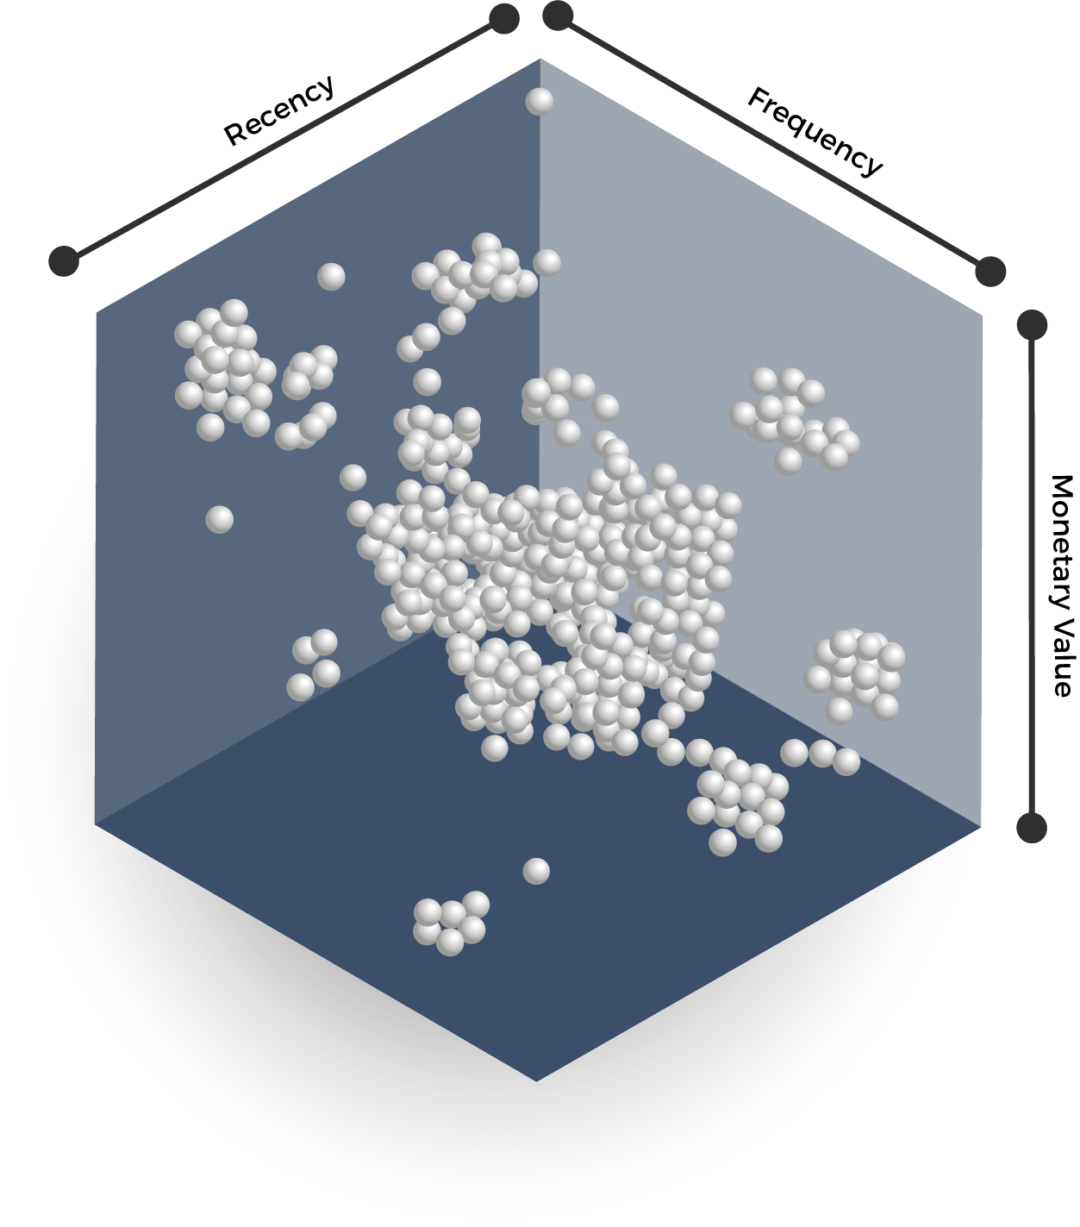

## 1. monetary

In [18]:
# new column: amount 
df['amount'] = df['Quantity']*df['UnitPrice']

## Monetry
grouped_df = df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## 2. frequency

In [19]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [20]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


## 3. recency

In [21]:
# convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

# compute the max date
max_date = max(df['InvoiceDate'])

# compute the diff
df['diff'] = max_date - df['InvoiceDate']

In [22]:
# recency
last_purchase = df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [23]:
# merge
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [24]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<AxesSubplot:xlabel='recency'>

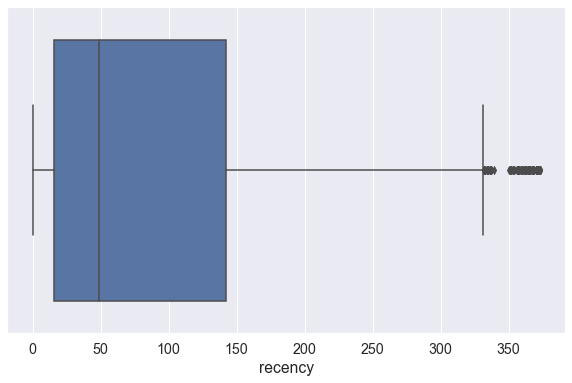

In [25]:
sns.boxplot(data=grouped_df,x='recency')

<AxesSubplot:xlabel='amount'>

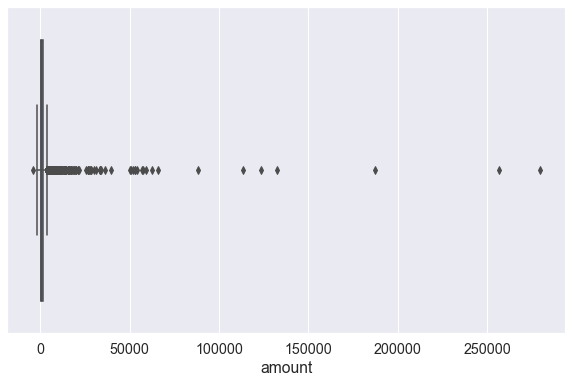

In [26]:
sns.boxplot(data=grouped_df,x='amount')

<AxesSubplot:xlabel='frequency'>

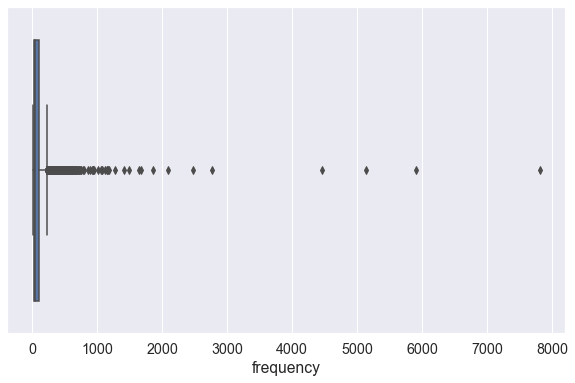

In [27]:
sns.boxplot(data=grouped_df,x='frequency')

In [28]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]

# <b>6<span style='color:#0000FF'>|</span> Standrization </b>

In [29]:
rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4295, 3)

In [30]:
rfm_df_scaled

array([[-0.72254177, -0.7508303 ,  2.30216587],
       [ 1.7352321 ,  1.05711173, -0.90615021],
       [ 0.30233283, -0.45955075, -0.18328887],
       ...,
       [-0.62183577, -0.64034496, -0.84673695],
       [ 0.44391999,  6.4708937 , -0.88634579],
       [ 0.3251656 , -0.06782998, -0.5001596 ]])

# <b>7 <span style='color:#0000FF'>|</span> Modeling </b>

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  K-means  </b></p>
</div>. 

### Elbow - Curve

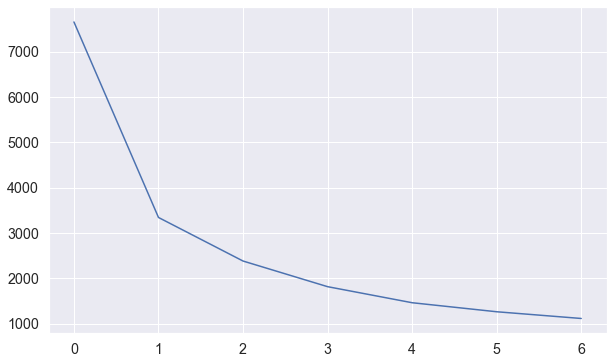

In [31]:
# choose the best number of clusters (K Value) using Elbow Method
scores = []
for num_clusters in range(2,15,2):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    scores.append(kmeans.inertia_)
    
# plot the Scores for each n_clusters
plt.plot(scores)

In [32]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [33]:
kmeans.labels_

array([2, 3, 0, ..., 0, 1, 0])

In [34]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,3
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [35]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.33292779, -0.34625288, -0.43576486],
       [ 3.04554912,  2.99164673, -0.74000299],
       [-0.50245886, -0.51779696,  1.5747122 ],
       [ 0.81327463,  0.88946331, -0.62395674]])

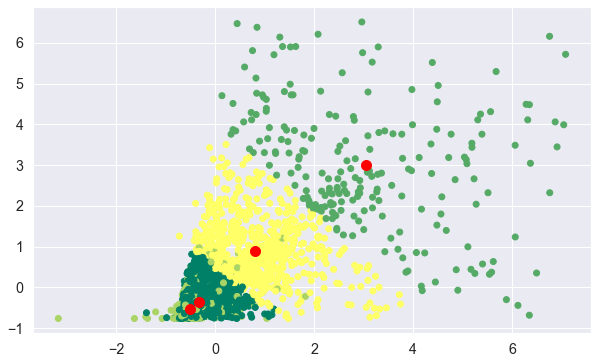

In [36]:
plt.scatter(rfm_df_scaled[:, 0], rfm_df_scaled[:,1], c=grouped_df['cluster_id'], cmap='summer')
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

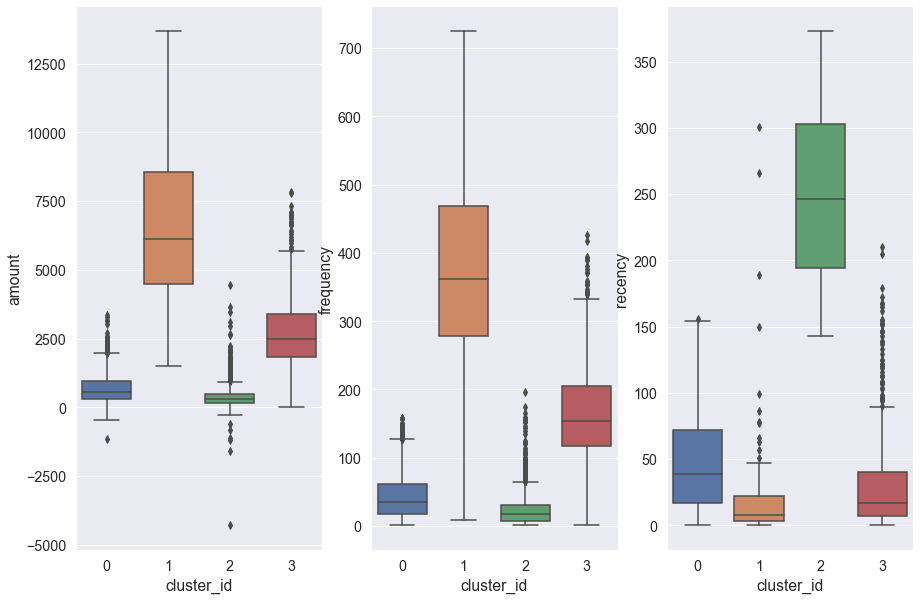

In [37]:
# plot
fig , ax = plt.subplots(1,3,figsize=(15,10))
for i,j in enumerate(['amount','frequency','recency']):
    sns.boxplot(x='cluster_id', y=j, data=grouped_df,ax=ax[i])


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Hierarchical Clustering  </b></p>
</div>. 

### Dendrogram

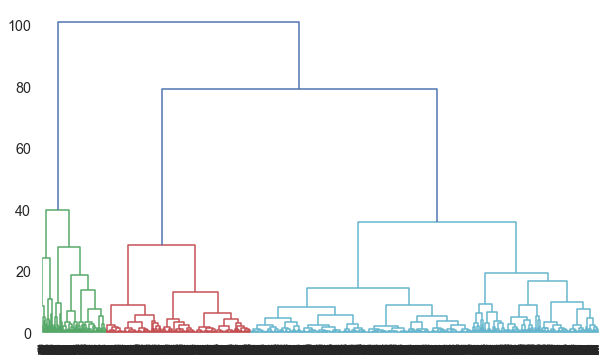

In [38]:
# choose the best number of clusters using The Dendrogram
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(rfm_df_scaled, method='ward'))

In [39]:
model = AgglomerativeClustering(n_clusters=3)
clusters = model.fit_predict(rfm_df_scaled)
clusters

array([2, 0, 1, ..., 1, 0, 1], dtype=int64)

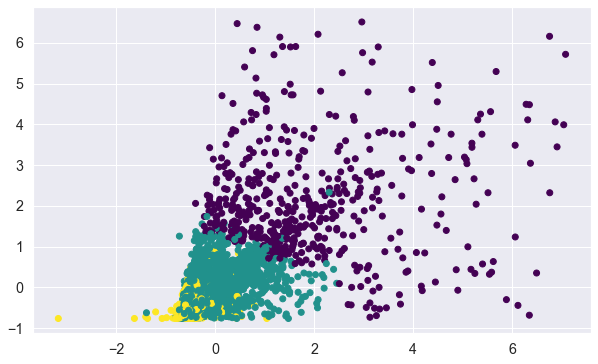

In [40]:
# visualising the clusters
plt.scatter(rfm_df_scaled[:, 0], rfm_df_scaled[:, 1], c=clusters, cmap='viridis')

In [41]:
# from the dendrogram , turns out the best clusters number is 4
model = AgglomerativeClustering(n_clusters=4)
clusters = model.fit_predict(rfm_df_scaled)
clusters

array([2, 1, 0, ..., 0, 1, 0], dtype=int64)

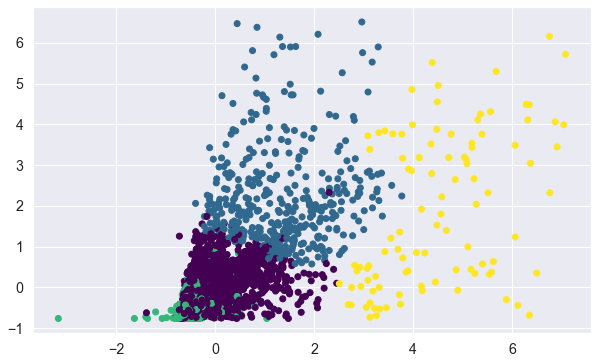

In [42]:
plt.scatter(rfm_df_scaled[:, 0], rfm_df_scaled[:, 1], c=clusters, cmap='viridis')

In [43]:
grouped_df['cluster_labels'] = clusters
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,2,2
1,12347.0,4310.00,182,1,3,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,2


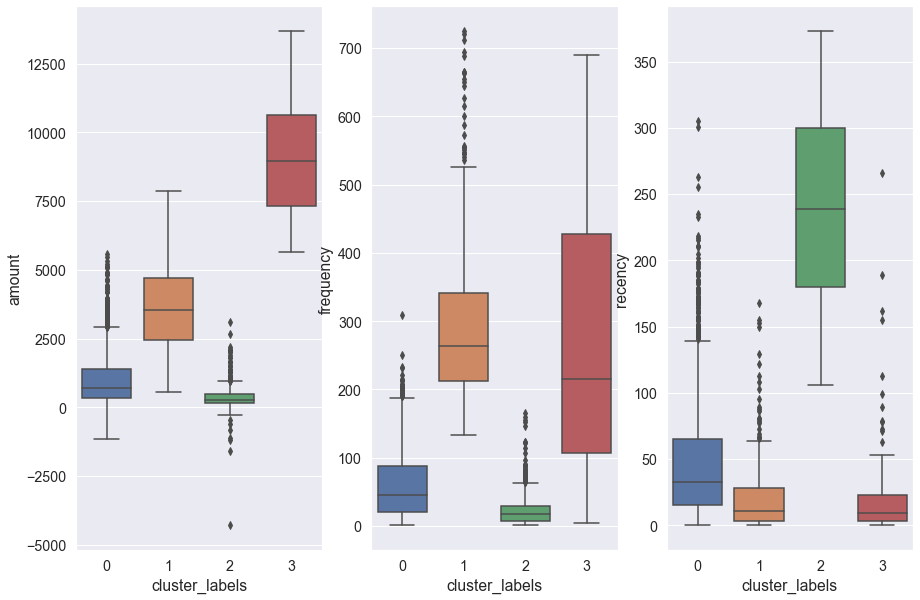

In [44]:
fig , ax = plt.subplots(1,3,figsize=(15,10))
for i,j in enumerate(['amount','frequency','recency']):
    sns.boxplot(x='cluster_labels', y=j, data=grouped_df,ax=ax[i])


### Ranking Customer’s based upon their recency, frequency, and monetary score

**Here we are normalizing the rank of the customers within a company to analyze the ranking.**

In [45]:
rfm_df= grouped_df.drop(['cluster_id','cluster_labels'],axis=1)

In [46]:
rfm_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [47]:
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['amount'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,amount,frequency,recency,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,0.00,2,325,3.926640,2.537835,2.537835
1,12347.0,4310.00,182,1,98.013167,89.383003,89.383003
2,12348.0,1797.24,31,74,38.760875,42.805588,42.805588
3,12349.0,1757.55,73,18,73.889020,67.846333,67.846333
4,12350.0,334.40,17,309,5.666588,25.215367,25.215367


<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;"> Calculating RFM score
 <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;"> </strong></p>


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 
    <br> <b> 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score </b> </br>
    <br>  </br>
    
    
<br></p>

In [48]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head()

,CustomerID,RFM_Score
0,12346.0,0.14
1,12347.0,4.53
2,12348.0,2.11
3,12349.0,3.44
4,12350.0,1.11


### Rating Customer based upon the RFM score
- **rfm score >4.5** : Top Customer
- **4.5 > rfm score > 4**: High Value Customer
- **4>rfm score >3**: Medium value customer
- **3>rfm score>1.6**: Low-value customer
- **rfm score<1.6**:Lost Customer

In [49]:
def rfm_score(x):
    if x > 4.5:
        return  "Top Customers"
    elif x>4:
        return "High value Customer"
    elif x>3:
        return "Medium Value Customer"
    elif x> 1.6:
        return 'Low Value Customers'
    else:
        return 'Lost Customers'

In [50]:
rfm_df["Customer_segment"] = rfm_df['RFM_Score'].apply(rfm_score)
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.14,Lost Customers
1,12347.0,4.53,Top Customers
2,12348.0,2.11,Low Value Customers
3,12349.0,3.44,Medium Value Customer
4,12350.0,1.11,Lost Customers
5,12352.0,3.62,Medium Value Customer
6,12353.0,0.35,Lost Customers
7,12354.0,2.71,Low Value Customers
8,12355.0,0.95,Lost Customers
9,12356.0,3.14,Medium Value Customer


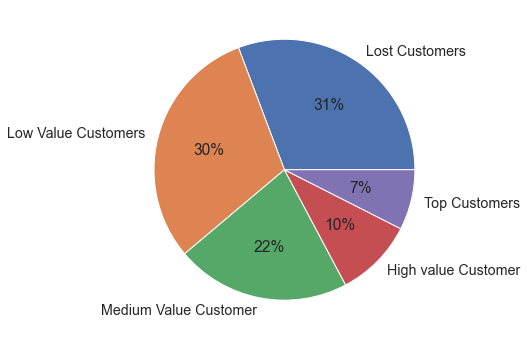

In [54]:
plt.pie(rfm_df.Customer_segment.value_counts(),labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()